# Snapshot from .vtp

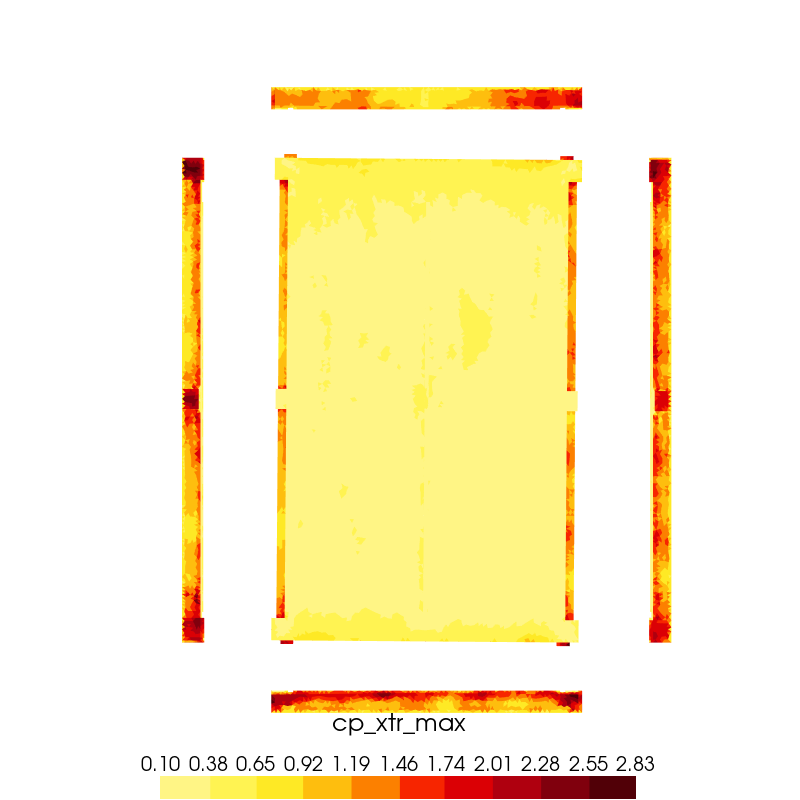

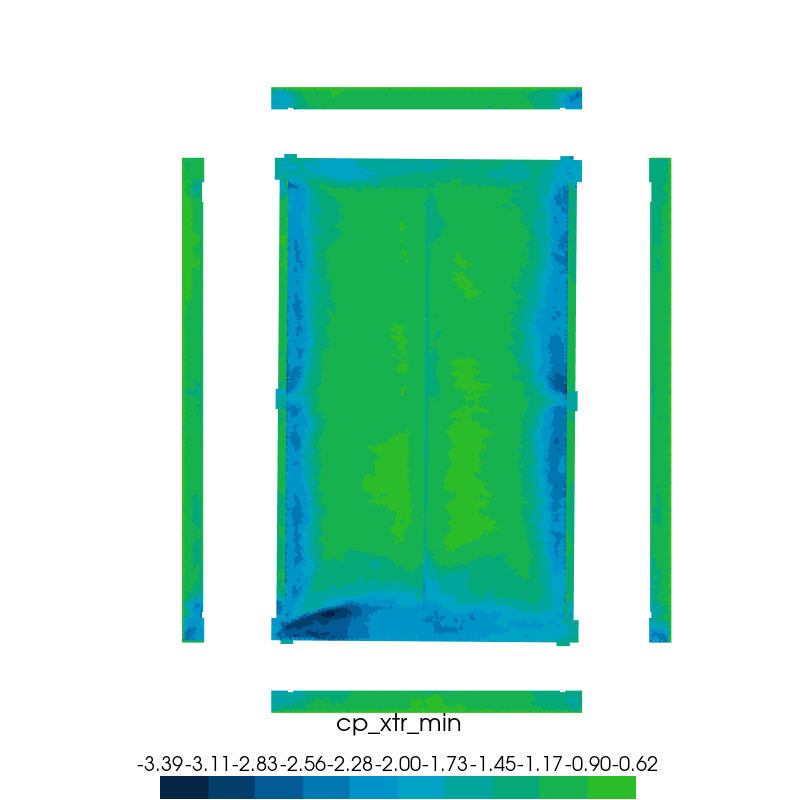

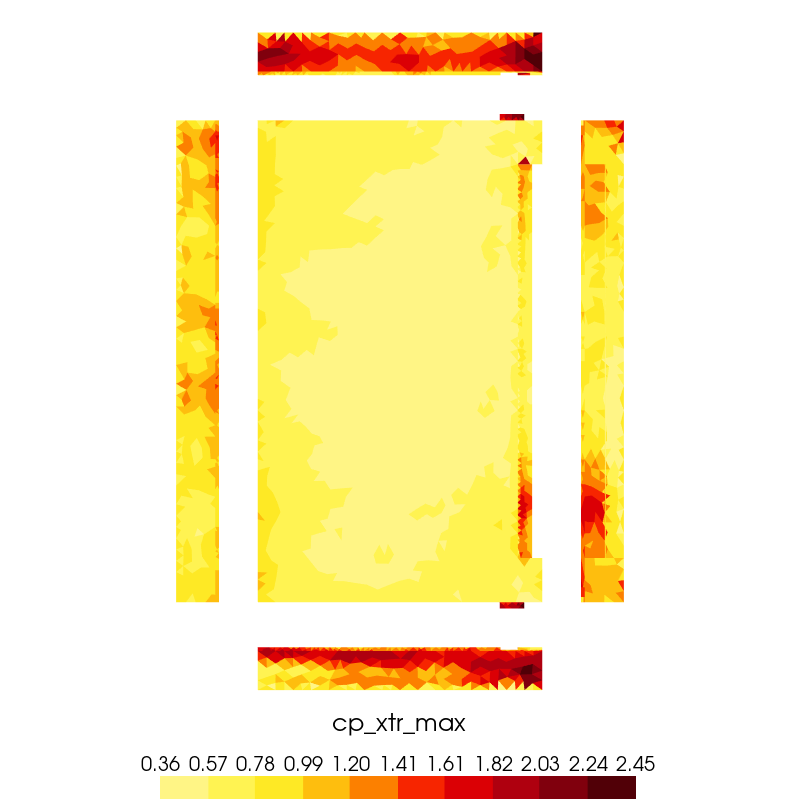

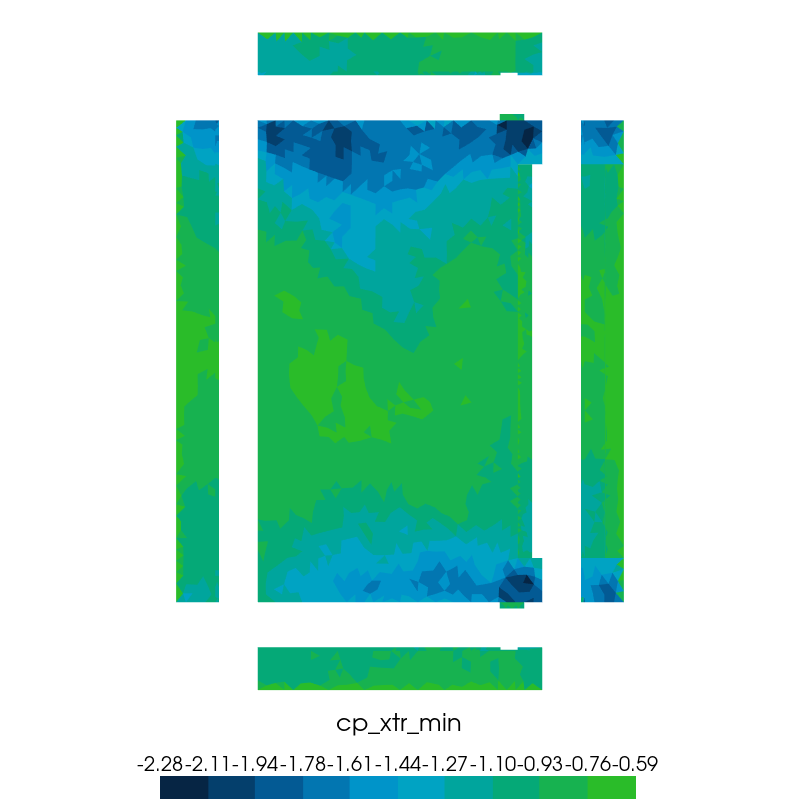

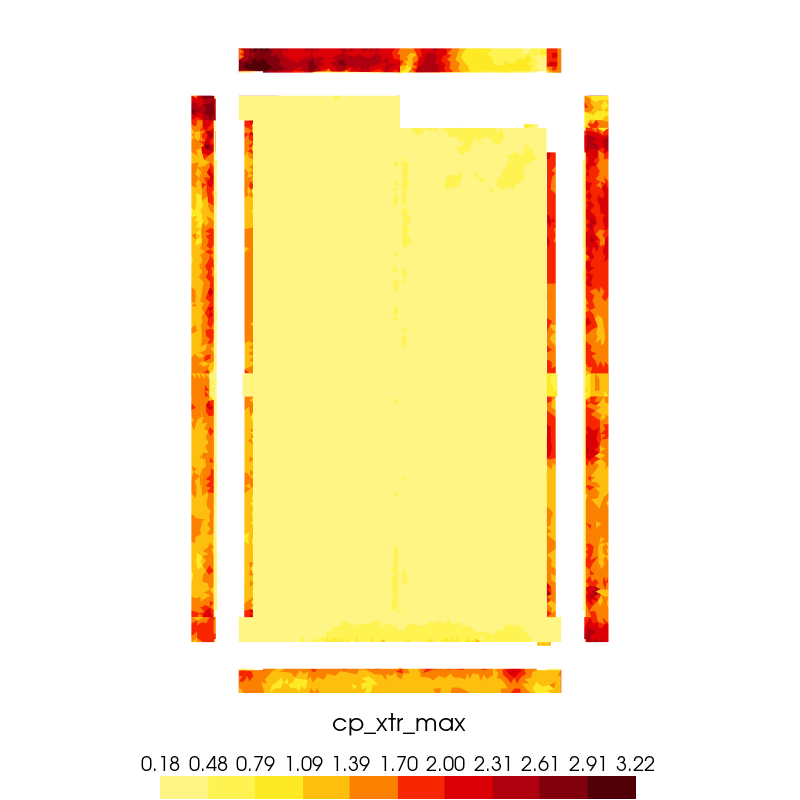

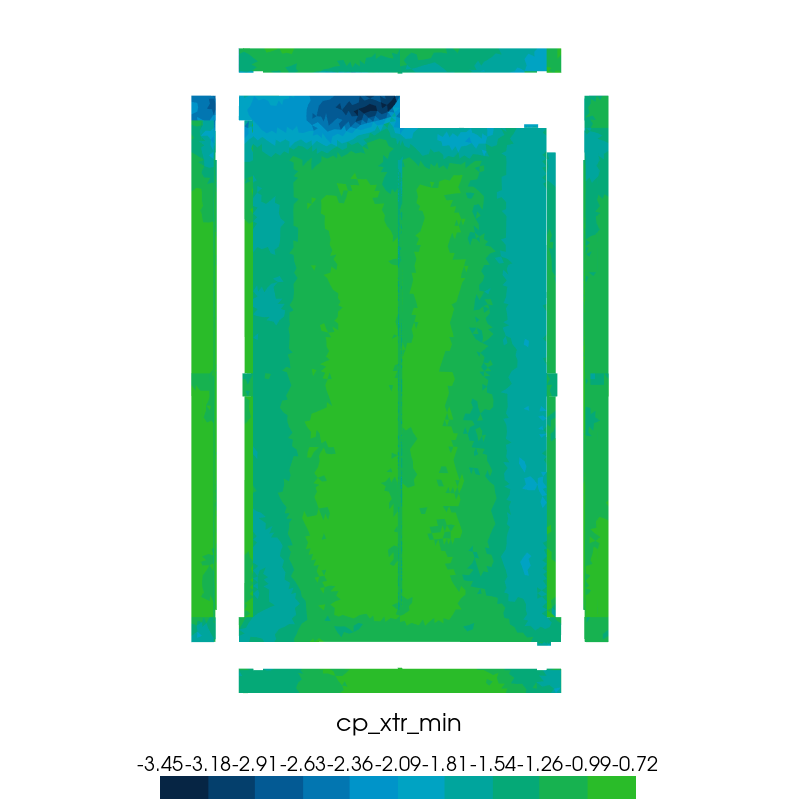

In [3]:
import pathlib

from cfdmod.use_cases.snapshot.camera import take_snapshot
from cfdmod.use_cases.snapshot.config import SnapshotConfig
from cfdmod.use_cases.snapshot.process_image import process_image
from cfdmod.utils import create_folder_path
import warnings

project_path = pathlib.Path("/home/ubuntu/Documentos/Repositories/insight/Docker/local/volume/PrologisCajamar4_final")

for block_lbl in ["G100", "G200", "G300"]:
    cfg_path = project_path / block_lbl / "configs" / "snapshot_params.yaml"
    cfg = SnapshotConfig.from_file(cfg_path)

    output_path = project_path / block_lbl / "images"
    create_folder_path(output_path)
    
    for polydata_cfg in cfg.polydata:
        vtp_path = pathlib.Path(polydata_cfg.file_path)
    
        for image_cfg in polydata_cfg.images:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                take_snapshot(
                    scalar_name=image_cfg.scalar_label,
                    file_path=vtp_path,
                    output_path=output_path / f"{image_cfg.image_label}.png",
                    colormap_params=cfg.colormap,
                    projection_params=cfg.projection,
                    camera_params=cfg.camera,
                )
            process_image(
                image_path=output_path / f"{image_cfg.image_label}.png",
                output_path=output_path / f"{image_cfg.image_label}.png",
                crop_cfg=cfg.camera.crop,
            )